# Statistical Inference on Car Price Prediction in the German Used Market

## 1. 📌 Introduction
- Objective: To perform hypothesis testing and confidence intervals on the dataset
- Dataset Source: Autoscout24.de or Kaggle  
- Features:
  - Brand: The brand or manufacturer of the car.
  - Model: The specific model of the car.
  - Color: The color of the car's exterior.
  - Registration Date: The date when the car was registered (Month/Year).
  - Year of Production: The year in which the car was manufactured.
  - Price in Euro: The price of the car in Euros.
  - Power: The power of the car in kilowatts (kW) and horsepower (ps).
  - Transmission Type: The type of transmission (e.g., automatic, manual).
  - Fuel Type: The type of fuel the car requires.
  - Fuel Consumption: Information about the car's fuel consumption in L/100km ang g/km.
  - Mileage: The total distance traveled by the car in km.
  - Offer Description: Additional description provided in the car offer.   
- Tools & Libraries Used
  - Python, Jupyter Notebbok
  - Libraries: Python Pandas, Numpy, SciPy, Scikit, Seaborn, Matplotlib

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [7]:
df_main=pd.read_csv("cars_dataset_cleaned.csv")
df_main.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,01.10.1995,1995.0,1300.0,148.0,201.0,Manual,Petrol,10.0,260.00,1605000.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo Spider,black,01.07.1995,1995.0,4900.0,110.0,150.0,Manual,Petrol,9.0,225.00,1895000.0,2.0 16V Twin Spark L
2,alfa-romeo,Alfa Romeo 164,red,01.11.1996,1996.0,17950.0,132.0,179.0,Manual,Petrol,7.0,52.15,961270.0,"3.0i Super V6, absoluter Topzustand !"
3,alfa-romeo,Alfa Romeo Spider,red,01.04.1996,1996.0,7900.0,110.0,150.0,Manual,Petrol,9.0,225.00,473070.0,2.0 16V Twin Spark
4,alfa-romeo,Alfa Romeo 145,red,01.12.1996,1996.0,3500.0,110.0,150.0,Manual,Petrol,8.0,210.00,2300000.0,Quadrifoglio


## Sampling 

For better understanding we will sample 100 cars for the following hypothesis tests

In [111]:
sampled_data=df_main.sample(n=100, replace=False, random_state=1500)
sampled_data

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
87158,mazda,Mazda 3,white,01.03.2015,2015.0,12998.0,110.0,150.0,Automatic,Diesel,4.0,127.00,1386600.0,Center-Line|Navi|Sitzheizung|SpurhalteAssist
193887,volkswagen,Volkswagen Polo,black,01.04.2007,2007.0,1500.0,59.0,80.0,Manual,Diesel,4.0,119.00,2347770.0,1.4 TDI DPF Tour
215058,volkswagen,Volkswagen Sharan,black,01.03.2020,2020.0,30990.0,110.0,150.0,Automatic,Petrol,6.0,155.00,588200.0,IQ.Drive 7-Sitze|elek.Türen|Navi|ACC|RFK
67299,ford,Ford Puma,black,01.02.2023,2023.0,26990.0,92.0,125.0,Automatic,Petrol,5.0,130.00,200.0,"1,0 EcoB. Hybrid 92kW Titanium Des. Auto"
22323,bmw,BMW 320,grey,01.07.2003,2003.0,3900.0,110.0,150.0,Manual,Diesel,5.0,41.60,2360000.0,320d touring Edition Sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162165,seat,SEAT Arona,black,01.12.2019,2019.0,15980.0,70.0,95.0,Manual,Petrol,4.0,113.00,70000.0,Style*SHZ*PDC*MFL*FrontAssist*USB*
119692,nissan,Nissan Pixo,black,01.09.2009,2009.0,3990.0,50.0,68.0,Manual,Petrol,4.0,99.00,740000.0,1.0 acenta
61499,ford,Ford Kuga,blue,01.11.2019,2019.0,21929.0,110.0,150.0,Manual,Petrol,7.0,158.00,275800.0,1.5 EcoBoost 2x4 Titanium+XENON+RFK
190528,volkswagen,Volkswagen Golf,blue,01.03.2001,2001.0,2500.0,85.0,116.0,Manual,Petrol,7.0,52.15,2515000.0,Match


## Hypothesis testing and Confidence Interval

### Hypothesis Testing

#### 1. Do automatic cars cost more than manual cars?

**Null Hypothesis ($H_o$):** Mean price (automatic)= Mean price (Manual)\
**Alternate Hypothesis ($H_\alpha$):** Mean price (automatic) ≠ Mean price (Manual)

In [113]:
sampled_data["transmission_type"].unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [115]:
manual=sampled_data[sampled_data["transmission_type"]=="Manual"]["price_in_euro"].dropna()
auto=sampled_data[sampled_data["transmission_type"]=="Automatic"]["price_in_euro"].dropna()

In [117]:
significance_level=0.05
significance_level

0.05

In [119]:
t_stat, p_val=ttest_ind(a=manual, b=auto, equal_var=False)
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.3f}")

T-statistic = -4.42, p-value = 0.000


A very large negative T value means manual cars are much cheaper than automatic ones on average. The null p value is less than the significance level of 0.05. Therefore we reject the null hypothesis. We accept the alternative hypothesis and can conclude that Mean price of the automatic cars are not equal to the mean price of the manual ones.

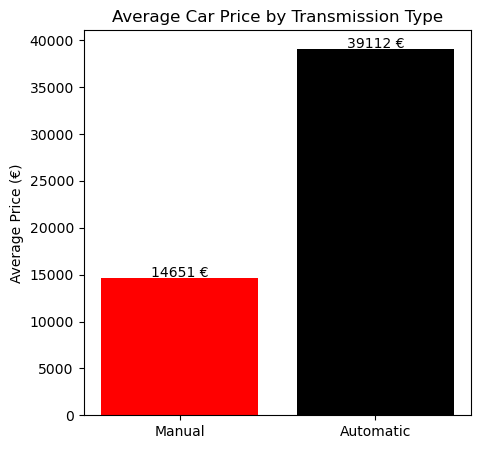

In [121]:
manual_mean = manual.mean()
auto_mean = auto.mean()
plt.figure(figsize=(5, 5))
plt.bar(["Manual", "Automatic"], [manual_mean, auto_mean], color=["red", "black"])
plt.title("Average Car Price by Transmission Type")
plt.ylabel("Average Price (€)")
plt.text(0, manual_mean + 100, f"{manual_mean:.0f} €", ha='center')
plt.text(1, auto_mean + 100, f"{auto_mean:.0f} €", ha='center')
plt.show()

This is also proven by the bar graph where the mean of the automatic cars is noticeably higher than the manual cars

#### 2. Do diesel cars have higher mileage than petrol cars?

**Null Hypothesis ($H_o$):** Mean mileage (Diesel cars)= Mean mileage (petrol cars)\
**Alternate Hypothesis ($H_\alpha$):** Mean mileage (Diesel cars) ≠ Mean mileage (petrol cars)

In [123]:
diesel=sampled_data[sampled_data["fuel_type"]=="Diesel"]["mileage_in_km"].dropna()
petrol=sampled_data[sampled_data["fuel_type"]=="Petrol"]["mileage_in_km"].dropna()

In [125]:
significance_level=0.05
significance_level

0.05

In [127]:
t_stat, p_val=ttest_ind(a=diesel, b=petrol, equal_var=False)
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:2f}")

T-statistic = 2.30, p-value = 0.024326


The p-value is again less than the significance level, so we reject the null hypothesis

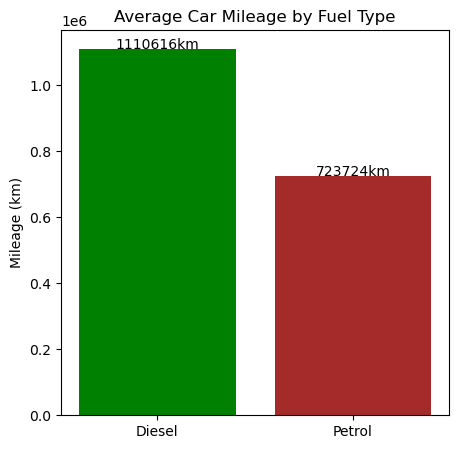

In [142]:
diesel_mean = diesel.mean()
petrol_mean = petrol.mean()
plt.figure(figsize=(5, 5))
plt.bar(["Diesel", "Petrol"], [diesel_mean, petrol_mean], color=["green", "brown"])
plt.title("Average Car Mileage by Fuel Type")
plt.ylabel("Mileage (km)")
plt.text(0, diesel_mean + 100, f"{diesel_mean:.0f}km", ha='center')
plt.text(1, petrol_mean + 100, f"{petrol_mean:.0f}km", ha='center')
plt.show()

- This is true as Diesel cars gives more mileage than the Petrol cars. 
- The density of the Diesel fuel is more than Petrol. Therefore, we can expect almost 20-25% more mileage of Diesel cars than Petrol cars.
- the density of the Diesel fuel also allows engines to extract more energy from the same volume of fuel, resulting in better fuel efficiency.

#### 3. Is the average price of BMW cars significantly different than the Audi cars?

**Null Hypothesis ($H_o$):** Average price (BMW)= Average Price (Audi)\
**Alternate Hypothesis ($H_\alpha$):** Average price (BMW) ≠Average Price (Audi)

In [148]:
sampled_data["brand"].unique()

array(['mazda', 'volkswagen', 'ford', 'bmw', 'citroen', 'mercedes-benz',
       'hyundai', 'audi', 'mini', 'kia', 'skoda', 'fiat', 'bentley',
       'opel', 'smart', 'peugeot', 'volvo', 'toyota', 'jeep',
       'alfa-romeo', 'porsche', 'daihatsu', 'nissan', 'renault',
       'land-rover', 'seat'], dtype=object)

In [150]:
bmw=sampled_data[sampled_data["brand"]=="bmw"]["price_in_euro"].dropna()
audi=sampled_data[sampled_data["brand"]=="audi"]["price_in_euro"].dropna()

In [152]:
significance_level=0.05
significance_level

0.05

In [154]:
t_stat, p_val=ttest_ind(a=bmw, b=audi, equal_var=False)
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:2f}")

T-statistic = -1.51, p-value = 0.154022


The p value is greater than the significance level, therefore we fail to reject the null hypothesis. This means the average price of BMW cars are almost equal to the average price of Audi cars. 

### Confidence Intervals

#### 1. 95% CI for the mean prices of the VW cars.

In [177]:
vw_prices=df_main[df_main["brand"]== "volkswagen"]["price_in_euro"].dropna()
mean = np.mean(vw_prices)
sem = stats.sem(vw_prices)
ci = stats.t.interval(0.95, len(vw_prices)-1, loc=mean, scale=sem)
print(f"VW Mean Price = €{mean:.2f}, 95% CI = {ci}")

VW Mean Price = €18467.26, 95% CI = (18301.764281768366, 18632.76333816027)


#### 2. CI for average price: <100k km vs >100k km

In [203]:
low = df_main[df_main['mileage_in_km'] <= 100000]['price_in_euro'].dropna()
high = df_main[df_main['mileage_in_km'] > 100000]['price_in_euro'].dropna()

low_ci = stats.t.interval(0.95, len(low)-1, loc=low.mean(), scale=stats.sem(low))
high_ci = stats.t.interval(0.95, len(high)-1, loc=high.mean(), scale=stats.sem(high))

print(f"<100k km → Mean = €{low.mean():.2f}, 95% CI = {low_ci}")
print(f">100k km → Mean = €{high.mean():.2f}, 95% CI = {high_ci}")

<100k km → Mean = €44465.64, 95% CI = (43765.029208785796, 45166.25626904328)
>100k km → Mean = €21652.56, 95% CI = (21545.13243672155, 21759.980352938124)
